In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import gaussian_kde
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib

In [2]:
matplotlib.rcParams['font.size'] = 13

In [3]:

sample_package_delivery = lambda t : lambda n : np.random.normal(t, 3600, n)

package_delivery_choices = lambda d, n : sample_package_delivery(9*3600+24*3600*d)(n)

exp_distribution = lambda lambda_ : lambda x : lambda_ * np.exp(-lambda_ * x)
my_exp = exp_distribution(0.3)
exp_probs = lambda d : [my_exp(i)/sum([my_exp(j) for j in range(d)]) for i in range(d)]


samples_for_days = lambda d : lambda n : np.concatenate([package_delivery_choices(i, n) for i, n in
                                                    zip(*np.unique(np.random.choice(list(range(d)), size=n, p=exp_probs(d)), return_counts=True))
                                         ])

pdf_for_days = lambda d : lambda x_vals : [
    np.sum([p*stats.norm.pdf(x, loc=9*3600+24*3600*i, scale=3600) for i, p in enumerate(exp_probs(d))])
    for x in x_vals]

five_days = samples_for_days(5)

data_1 = five_days(50)
#more_data_1 = five_days(100000)

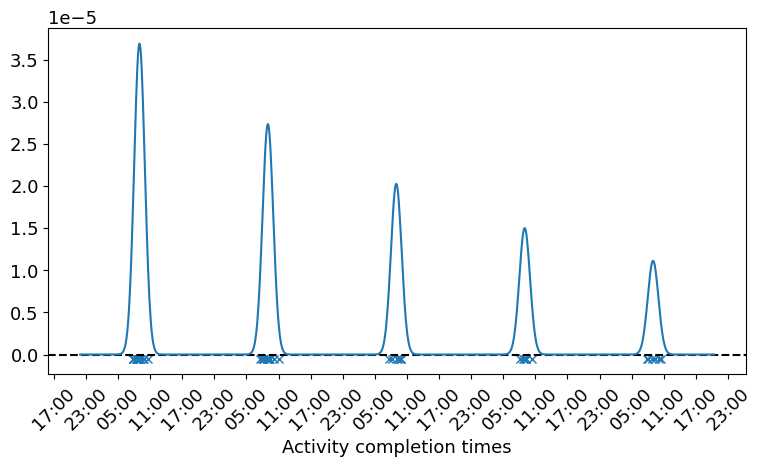

In [4]:
# Plot the data as small crosses on the x-axis
#dates = [datetime.fromtimestamp(ts) for ts in data]

plt.figure(figsize=(9, 4.5))

colors=plt.rcParams["axes.prop_cycle"]()

converted_data_1 = [datetime(2025, 1, 1) + timedelta(seconds=d) for d in data_1]
plt.plot(converted_data_1, np.full_like(converted_data_1, -0.0000005), 'x', color=next(colors)['color'])
plt.axhline(y=0.0, color="black", linestyle="--", linewidth=1.5)

x_vals = np.linspace(np.min(data_1) - 0.1 * np.ptp(data_1), np.max(data_1) + 0.1 * np.ptp(data_1),
                    1000)
converted_x_vals = [datetime(2025, 1, 1) + timedelta(seconds=d) for d in x_vals]

colors=plt.rcParams["axes.prop_cycle"]()
#pdf = gaussian_kde(more_data_1)
#plt.plot(x_vals, pdf(x_vals), color=next(colors)['color'])

pdf = pdf_for_days(5)
plt.plot(converted_x_vals, pdf(x_vals), color=next(colors)['color'])


plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Every 2 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # '%j' shows the day of the year
plt.xticks(rotation=45)
#plt.gca().xaxis.set_minor_locator(mdates.HourLocator(byhour=[8, 10, 12, 14, 16, 18, 20, 22]))  # Every second hour

# Format the minor ticks
#plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel("Activity completion times")
#plt.title("Data Points on X-Axis")

#plt.show()
plt.savefig("test.svg")

In [5]:
print(np.min(data_1) - 0.1 * np.ptp(data_1), np.max(data_1) + 0.1 * np.ptp(data_1))

-7509.61673533266 419178.6699176328


In [6]:
qc_activity = lambda t : lambda n : np.random.normal(t, 300, n)

qc_activity_count = lambda d, n : qc_activity(1800)(n)*np.exp(-d / 2)

exp_distribution = lambda lambda_ : lambda x : lambda_ * np.exp(-lambda_ * x)
my_exp = exp_distribution(0.3)
exp_probs = lambda d : [my_exp(i)/sum([my_exp(j) for j in range(d)]) for i in range(d)]


sample_all_qc = lambda d : lambda n : [qc_activity_count(i+1, n) for i, n in
                                                    zip(*np.unique(np.random.choice(list(range(d)), size=n, p=exp_probs(d)), return_counts=True))
                                         ]

five_qc_acs = sample_all_qc(5)

data_2 = five_qc_acs(100)
more_data_2 = five_qc_acs(1000000)

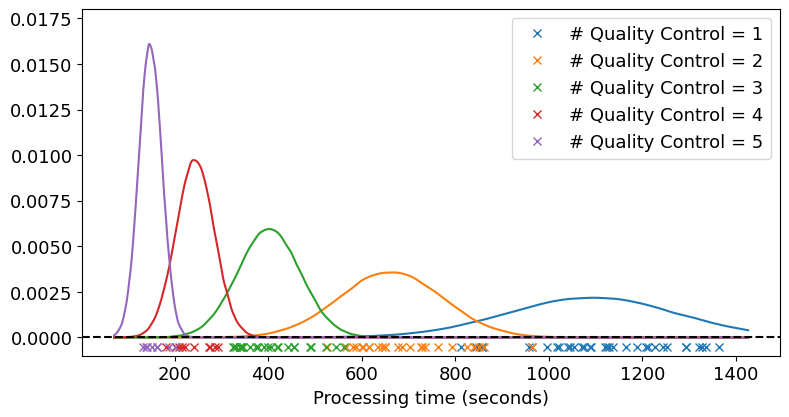

In [7]:
plt.figure(figsize=(9, 4.5))

colors=plt.rcParams["axes.prop_cycle"]()

# Plot the data as small crosses on the x-axis
for i, ac_data in enumerate(data_2):
    #dates = [datetime.fromtimestamp(ts) for ts in ac_data]
    plt.plot(ac_data, np.full_like(ac_data, -0.0005), 'x', color=next(colors)['color'], label="# Quality Control = "+str(i+1))

# Customize the plot (optional)
#plt.xlim(timedelta(seconds=100), max(dates)+timedelta(seconds=100))  # Adjust x-axis limits
plt.ylim(-0.001, 0.018)  # Adjust y-axis limits

colors=plt.rcParams["axes.prop_cycle"]()

x_vals = np.linspace(*plt.xlim(), 1000)
for i, ac_data in enumerate(more_data_2):
    pdf = gaussian_kde(ac_data)
    plt.plot(x_vals, pdf(x_vals), color=next(colors)['color'])

#plt.yticks([])  # Remove y-axis ticks
plt.axhline(y=0.0, color="black", linestyle="--", linewidth=1.5)
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = stats.norm.pdf([i.timestamp() for i in x], mu, std)
#plt.plot(x, p, 'k')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gcf().autofmt_xdate()  # Rotate date labels for better readability


plt.xlabel("Processing time (seconds)")
#plt.title("Data Points on X-Axis")

plt.legend()

#plt.show()
plt.savefig("test_2.svg")